<a href="https://colab.research.google.com/github/lasya1125/COMP562FinalProject/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from datetime import datetime
from sklearn.model_selection import train_test_split

In [16]:
df = pd.read_csv('movies.csv')
df.head()

,id,title,vote_average,overview,revenue,release_date
0,118365,"Moses, Prince of Egypt",5.5,"At birth, Moses, a Hebrew baby is abandoned on...",0,2000-01-01
1,10567,Dinosaur,6.5,An orphaned dinosaur raised by lemurs joins an...,354248063,2000-05-19
2,4247,Scary Movie,6.3,A familiar-looking group of teenagers find the...,278019771,2000-07-07
3,8871,How the Grinch Stole Christmas,6.7,Inside a snowflake exists the magical land of ...,345141403,2000-11-17
4,11688,The Emperor's New Groove,7.5,Kuzco is a self-centered emperor who summons P...,169327687,2000-12-15


In [17]:
df = df.drop(['id'], axis=1)
df.head()

,title,vote_average,overview,revenue,release_date
0,"Moses, Prince of Egypt",5.5,"At birth, Moses, a Hebrew baby is abandoned on...",0,2000-01-01
1,Dinosaur,6.5,An orphaned dinosaur raised by lemurs joins an...,354248063,2000-05-19
2,Scary Movie,6.3,A familiar-looking group of teenagers find the...,278019771,2000-07-07
3,How the Grinch Stole Christmas,6.7,Inside a snowflake exists the magical land of ...,345141403,2000-11-17
4,The Emperor's New Groove,7.5,Kuzco is a self-centered emperor who summons P...,169327687,2000-12-15


In [18]:
print(df.isnull().sum())
print(df.shape)

title           0
vote_average    0
overview        9
revenue         0
release_date    0
dtype: int64
(6000, 5)


In [19]:
df = df.dropna(axis=0)
print(df.isnull().sum())
print(df.shape)

title           0
vote_average    0
overview        0
revenue         0
release_date    0
dtype: int64
(5991, 5)


In [25]:
df = df.loc[df['revenue'] != 0]
df.shape

(3884, 5)

In [35]:
df['title'] = df['title'].astype('category')
df['overview'] = df['overview'].astype('category')
df['release_date']= pd.to_datetime(df['release_date'])
print(df.dtypes)

title                 category
vote_average           float64
overview              category
revenue                  int64
release_date    datetime64[ns]
dtype: object


In [73]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=4)

In [36]:
df.describe()

,vote_average,revenue
count,3884.000000,3.884000e+03
mean,6.421138,1.442320e+08
std,0.830765,2.196025e+08
min,2.700000,1.000000e+00
25%,5.900000,2.270706e+07
50%,6.400000,6.991741e+07
75%,7.000000,1.680251e+08
max,8.600000,2.797801e+09


(array([   8.,    8.,   51.,  116.,  435., 1013., 1102.,  720.,  352.,
          79.]),
 array([2.7 , 3.29, 3.88, 4.47, 5.06, 5.65, 6.24, 6.83, 7.42, 8.01, 8.6 ]),
 <a list of 10 Patch objects>)

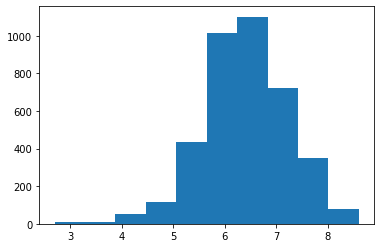

In [43]:
plt.hist(df['vote_average'])

([<matplotlib.axis.XTick at 0x7efc0e1abe90>,
 <a list of 10 Text major ticklabel objects>)

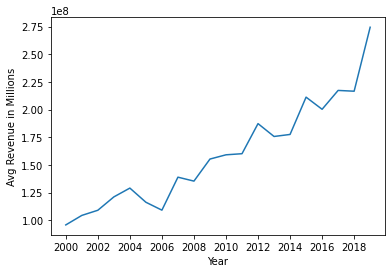

In [71]:
 series = df.groupby(df['release_date'].dt.year)['revenue'].agg('mean')
 plt.plot(series,)
 plt.xlabel("Year")
 plt.ylabel("Avg Revenue in Millions")
 plt.xticks(range(2000, 2019,2))